### Objective:The objective of this project is to develop a system for detecting anomalies in the operation of a cyclone preheater in an industrial setting. The cyclone preheater plays a critical role in the cement manufacturing process by preheating raw materials before they enter the kiln. Anomalies in the cyclone preheater operation can lead to reduced efficiency, increased energy consumption, and potential equipment failures.

The challenge is to develop a model that can analyze various sensor readings and operational parameters of the cyclone preheater system and identify anomalies in real-time. The model should be able to detect deviations from normal operating patterns, such as abnormal temperature, pressure, or gas flow rates, which may indicate potential issues or malfunctions in the cyclone preheater..




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the necessary library

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
# from sklearn.preprocessing import StandardScaler

In [ ]:
# Read dataset in dataframe
df = pd.read_excel('/content/drive/MyDrive/data/data.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
# show dataframe
df.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object        
 2   Cyclone_Material_Temp     377719 non-null  object        
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object        
 4   Cyclone_cone_draft        377719 non-null  object        
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object        
 6   Cyclone_Inlet_Draft       377719 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 20.2+ MB


In [ ]:
df.shape

(377719, 7)

In [ ]:
df.nunique()

time                        377719
Cyclone_Inlet_Gas_Temp       39736
Cyclone_Material_Temp        39662
Cyclone_Outlet_Gas_draft     27669
Cyclone_cone_draft           26487
Cyclone_Gas_Outlet_Temp      48044
Cyclone_Inlet_Draft          24010
dtype: int64

In [ ]:
df.value_counts()

time                 Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  Cyclone_Gas_Outlet_Temp  Cyclone_Inlet_Draft
2017-01-01 00:00:00  867.63                  910.42                 -189.54                   -186.04             852.13                   -145.90                1
2019-05-27 08:00:00  892.82                  951.63                 -233.09                   -192.52             894.57                   -170.70                1
2019-05-27 08:45:00  865.27                  895.20                 -211.56                   -187.74             894.47                   -156.47                1
2019-05-27 08:40:00  894.66                  952.60                 -223.55                   -191.80             907.87                   -164.87                1
2019-05-27 08:35:00  866.15                  903.77                 -230.33                   -202.30             882.48                   -173.55                1
                     

In [ ]:
df.Cyclone_Inlet_Gas_Temp.unique()

array([867.63, 879.23, 875.67, ..., 1025.83, 1028.53, 986.66],
      dtype=object)

# PreProcessing

### 1) Convert multiple columns object datatype to float


In [ ]:
df['Cyclone_Inlet_Gas_Temp'].unique()

array([867.63, 879.23, 875.67, ..., 1025.83, 1028.53, 986.66],
      dtype=object)

In [ ]:
# while parse object into float we get following error
# ValueError: could not convert string to float: 'I/O Timeout'
# we need to replace this value with Null

In [ ]:
# convert only numeric values and NaN for the rest in the column

df['Cyclone_Inlet_Gas_Temp']=pd.to_numeric(df['Cyclone_Inlet_Gas_Temp'], errors='coerce')
df['Cyclone_Material_Temp']=pd.to_numeric(df['Cyclone_Material_Temp'], errors='coerce')
df['Cyclone_Outlet_Gas_draft']=pd.to_numeric(df['Cyclone_Outlet_Gas_draft'], errors='coerce')
df['Cyclone_cone_draft']=pd.to_numeric(df['Cyclone_cone_draft'], errors='coerce')
df['Cyclone_Gas_Outlet_Temp']=pd.to_numeric(df['Cyclone_Gas_Outlet_Temp'], errors='coerce')
df['Cyclone_Inlet_Draft']=pd.to_numeric(df['Cyclone_Inlet_Draft'], errors='coerce')

### 2) Sum of NaN value in df

In [ ]:
df.isnull().sum()

time                           0
Cyclone_Inlet_Gas_Temp      1320
Cyclone_Material_Temp       1591
Cyclone_Outlet_Gas_draft    1321
Cyclone_cone_draft          1320
Cyclone_Gas_Outlet_Temp     1321
Cyclone_Inlet_Draft         1322
dtype: int64

# Describe

In [ ]:
df.isna().any()

time                        False
Cyclone_Inlet_Gas_Temp       True
Cyclone_Material_Temp        True
Cyclone_Outlet_Gas_draft     True
Cyclone_cone_draft           True
Cyclone_Gas_Outlet_Temp      True
Cyclone_Inlet_Draft          True
dtype: bool

In [ ]:
df.isna().sum()

time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cyclone_Inlet_Gas_Temp,376399.0,727.348549,328.664814,0.00,856.2700,882.380,901.11,1157.63
Cyclone_Material_Temp,376128.0,750.830483,350.921068,-185.00,867.6675,913.360,943.66,1375.00
Cyclone_Outlet_Gas_draft,376398.0,-177.820685,99.147236,-456.66,-247.1900,-215.260,-170.13,40.27
Cyclone_cone_draft,376399.0,-164.572619,90.103023,-459.31,-226.7700,-198.560,-143.64,488.86
Cyclone_Gas_Outlet_Temp,376398.0,715.759972,325.346446,13.79,801.9600,871.525,899.30,1375.00
Cyclone_Inlet_Draft,376397.0,-141.302857,77.615576,-396.37,-193.5100,-169.460,-136.29,41.64


### 4) finding the max values of each column

In [ ]:
df.max()

time                        2020-08-07 12:15:00
Cyclone_Inlet_Gas_Temp                  1157.63
Cyclone_Material_Temp                    1375.0
Cyclone_Outlet_Gas_draft                  40.27
Cyclone_cone_draft                       488.86
Cyclone_Gas_Outlet_Temp                  1375.0
Cyclone_Inlet_Draft                       41.64
dtype: object

### 5) finding the min values of each column

In [ ]:
df.min()

time                        2017-01-01 00:00:00
Cyclone_Inlet_Gas_Temp                      0.0
Cyclone_Material_Temp                    -185.0
Cyclone_Outlet_Gas_draft                -456.66
Cyclone_cone_draft                      -459.31
Cyclone_Gas_Outlet_Temp                   13.79
Cyclone_Inlet_Draft                     -396.37
dtype: object

:### 6) fill missing values : with MEAN

Mean is less likely to distort the statistical properties of the variable compared to other imputation methods. It keeps the variance relatively stable

In [ ]:
df['Cyclone_Inlet_Gas_Temp'].fillna((df['Cyclone_Inlet_Gas_Temp'].mean()), inplace=True)
df['Cyclone_Material_Temp'].fillna((df['Cyclone_Material_Temp'].mean()), inplace=True)
df['Cyclone_Outlet_Gas_draft'].fillna((df['Cyclone_Outlet_Gas_draft'].mean()), inplace=True)
df['Cyclone_cone_draft'].fillna((df['Cyclone_cone_draft'].mean()), inplace=True)
df['Cyclone_Gas_Outlet_Temp'].fillna((df['Cyclone_Gas_Outlet_Temp'].mean()), inplace=True)
df['Cyclone_Inlet_Draft'].fillna((df['Cyclone_Inlet_Draft'].mean()), inplace=True)


In [ ]:
df.isna().any()

time                        False
Cyclone_Inlet_Gas_Temp      False
Cyclone_Material_Temp       False
Cyclone_Outlet_Gas_draft    False
Cyclone_cone_draft          False
Cyclone_Gas_Outlet_Temp     False
Cyclone_Inlet_Draft         False
dtype: bool

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cyclone_Inlet_Gas_Temp,377719.0,727.348549,328.090023,0.00,855.580,882.25,901.04,1157.63
Cyclone_Material_Temp,377719.0,750.830483,350.181224,-185.00,866.335,913.07,943.51,1375.00
Cyclone_Outlet_Gas_draft,377719.0,-177.820685,98.973710,-456.66,-247.080,-214.98,-170.56,40.27
Cyclone_cone_draft,377719.0,-164.572619,89.945445,-459.31,-226.670,-198.33,-144.44,488.86
Cyclone_Gas_Outlet_Temp,377719.0,715.759972,324.777028,13.79,796.760,871.30,899.19,1375.00
Cyclone_Inlet_Draft,377719.0,-141.302857,77.479631,-396.37,-193.400,-169.30,-136.69,41.64


In [ ]:
df.nunique()

time                        377719
Cyclone_Inlet_Gas_Temp       39732
Cyclone_Material_Temp        39657
Cyclone_Outlet_Gas_draft     27664
Cyclone_cone_draft           26483
Cyclone_Gas_Outlet_Temp      48039
Cyclone_Inlet_Draft          24005
dtype: int64

In [ ]:
df.isnull().sum()

time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

### 7) built differnt df for differnt feature column

In [ ]:
df1=pd.DataFrame(df[['time','Cyclone_Inlet_Gas_Temp']])
df1.head()

,time,Cyclone_Inlet_Gas_Temp
0,2017-01-01 00:00:00,867.63
1,2017-01-01 00:05:00,879.23
2,2017-01-01 00:10:00,875.67
3,2017-01-01 00:15:00,875.28
4,2017-01-01 00:20:00,891.66


In [ ]:
df2=pd.DataFrame(df[['time','Cyclone_Material_Temp']])
df2.head()

,time,Cyclone_Material_Temp
0,2017-01-01 00:00:00,910.42
1,2017-01-01 00:05:00,918.14
2,2017-01-01 00:10:00,924.18
3,2017-01-01 00:15:00,923.15
4,2017-01-01 00:20:00,934.26


In [ ]:
df3=pd.DataFrame(df[['time','Cyclone_Outlet_Gas_draft']])
df3.head()

,time,Cyclone_Outlet_Gas_draft
0,2017-01-01 00:00:00,-189.54
1,2017-01-01 00:05:00,-184.33
2,2017-01-01 00:10:00,-181.26
3,2017-01-01 00:15:00,-179.15
4,2017-01-01 00:20:00,-178.32


In [ ]:
df4=pd.DataFrame(df[['time','Cyclone_cone_draft']])
df4.head()

,time,Cyclone_cone_draft
0,2017-01-01 00:00:00,-186.04
1,2017-01-01 00:05:00,-182.10
2,2017-01-01 00:10:00,-166.47
3,2017-01-01 00:15:00,-174.83
4,2017-01-01 00:20:00,-173.72


In [ ]:
df5=pd.DataFrame(df[['time','Cyclone_Gas_Outlet_Temp']])
df5.head()

,time,Cyclone_Gas_Outlet_Temp
0,2017-01-01 00:00:00,852.13
1,2017-01-01 00:05:00,862.53
2,2017-01-01 00:10:00,866.06
3,2017-01-01 00:15:00,865.85
4,2017-01-01 00:20:00,876.06


In [ ]:
df6=pd.DataFrame(df[['time','Cyclone_Inlet_Draft']])
df6.head()

,time,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,-145.90
1,2017-01-01 00:05:00,-149.76
2,2017-01-01 00:10:00,-145.01
3,2017-01-01 00:15:00,-142.82
4,2017-01-01 00:20:00,-143.39


# 3) Anomaly Detection

#### We are going to use Isolation Forest for outlier detection



### 3.1) Cyclone_Inlet_Gas_Temp

In [ ]:
# dataset having values in the interval of 5 min we turn it into hourly
# Sets the "time" column of the DataFrame df1 as the index
# Resamples the DataFrame based on a time frequency of 'H'
# mean() after resampling, it calculates the average value for each column within each hourly period , to aggregate
# reset_index(): converts the index (which is the hourly time values) back into a regular column and assigns a default numerical index to each row

df1_s=df1.set_index('time').resample('H').mean().reset_index()

extracts the hour component from the 'time' column

In [ ]:
df1_s['hour']=df1.time.dt.hour

In [ ]:
df1_s

,time,Cyclone_Inlet_Gas_Temp,hour
0,2017-01-01 00:00:00,883.713333,0
1,2017-01-01 01:00:00,875.574167,0
2,2017-01-01 02:00:00,876.804167,0
3,2017-01-01 03:00:00,877.250000,0
4,2017-01-01 04:00:00,874.260833,0
...,...,...,...
31544,2020-08-07 08:00:00,883.537500,12
31545,2020-08-07 09:00:00,885.354167,12
31546,2020-08-07 10:00:00,892.568333,12
31547,2020-08-07 11:00:00,893.565000,12


In [ ]:
df1_s.isna().sum()

time                       0
Cyclone_Inlet_Gas_Temp    69
hour                       0
daylight                   0
DayOfTheWeek               0
WeekDay                    0
month                      0
dtype: int64

In [ ]:
df1_s['Cyclone_Inlet_Gas_Temp'].fillna(df1_s['Cyclone_Inlet_Gas_Temp'].mean(), inplace=True)


In [ ]:
df1_s.hour.nunique()

24

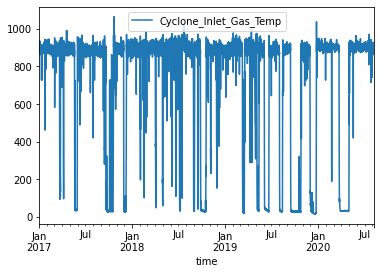

In [ ]:
df1_s.plot(x='time', y='Cyclone_Inlet_Gas_Temp')

<Axes: xlabel='Cyclone_Inlet_Gas_Temp', ylabel='Density'>

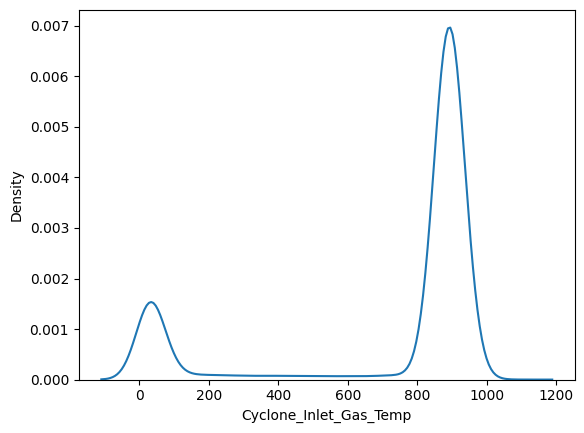

In [ ]:
import seaborn as sns
sns.kdeplot(df1_s['Cyclone_Inlet_Gas_Temp'])

### 3.1.1) Feature engineering

##### extract some feature to understand temperature variation in following condition
#####  day or night
#####  week day
#####  Monthly

In [ ]:
# the hours and if it's night or day (7:00-16:00)

df1_s['daylight'] = ((df1_s['hour'] >= 7) & (df1_s['hour'] <= 16)).astype(int)

In [ ]:
# the day of the week (Monday=0, Sunday=6) and if it's a week end day or week day.
df1_s['DayOfTheWeek'] = df1_s['time'].dt.dayofweek
# df1['WeekDay'] = (df1['DayOfTheWeek'] < 5).astype(int)
df1_s['WeekDay'] =pd.Categorical(df1_s.time.dt.strftime('%A'), categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered= True)

#### ploting temp. variation on weekday

<Axes: xlabel='WeekDay'>

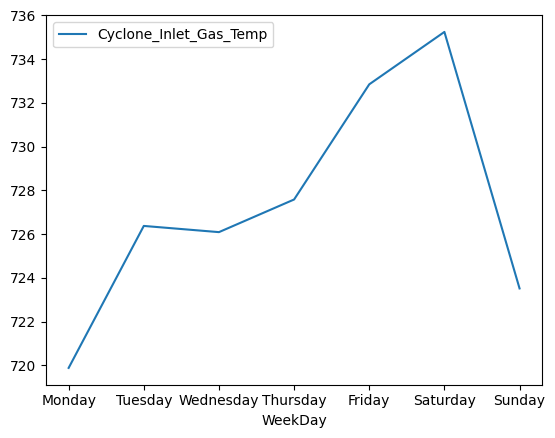

In [ ]:
df1_s[['Cyclone_Inlet_Gas_Temp','WeekDay']].groupby('WeekDay').mean().plot()

Above graph shows cyclone inlet gas temp decrease on sunday and start increasing from monday

#### ploting temp. range on hour basis

<Axes: xlabel='hour'>

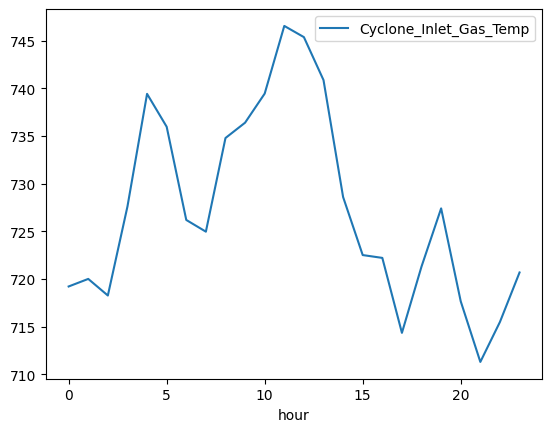

In [ ]:
df1_s[['Cyclone_Inlet_Gas_Temp','hour']].groupby('hour').mean().plot()

 Above graph shows cyclone inlet gas temp rich highest at 15.00 hrs and lowest on 21.00 hrs

In [ ]:
df1_s['month'] = pd.to_datetime(df1_s['time']).dt.month

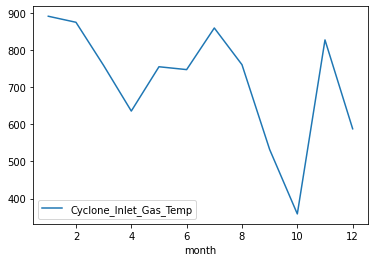

In [ ]:
df1_s[['Cyclone_Inlet_Gas_Temp','month']].groupby('month').mean().plot()

In [ ]:
df1_s.head()

,time,Cyclone_Inlet_Gas_Temp,hour,daylight,DayOfTheWeek,WeekDay,month
0,2017-01-01 00:00:00,883.713333,0,0,6,Sunday,1
1,2017-01-01 01:00:00,875.574167,0,0,6,Sunday,1
2,2017-01-01 02:00:00,876.804167,0,0,6,Sunday,1
3,2017-01-01 03:00:00,877.250000,0,0,6,Sunday,1
4,2017-01-01 04:00:00,874.260833,0,0,6,Sunday,1


above graph shows in 'octomber' month temp touches minimum point.

<Axes: xlabel='Cyclone_Inlet_Gas_Temp', ylabel='Count'>

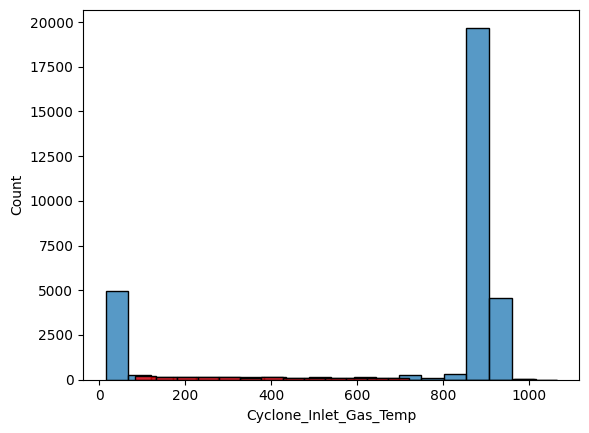

In [ ]:
sns.histplot(df1_s['Cyclone_Inlet_Gas_Temp'], bins=20)

# anomalies as red bars
anomalies = df1_s[df1_s['anomaly'] == -1]['Cyclone_Inlet_Gas_Temp']
sns.histplot(anomalies, color='red', bins=20)


In [ ]:
'''model = IsolationForest(n_estimators=150, max_samples='auto', max_features=1.0, contamination=0.05, random_state=10)
model.fit(df1_s[['Cyclone_Inlet_Gas_Temp']])
scores = model.decision_function(df1_s[['Cyclone_Inlet_Gas_Temp']])
anomaly = model.predict(df1_s[['Cyclone_Inlet_Gas_Temp']])
df1_s['scores'] = scores
df1_s['anomaly'] = anomaly'''
'''anomaly = df1_s.loc[df1_s['anomaly'] == -1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))
print(anomaly.head(10))'''
'''print('Total number of anomalies is:', len(anomaly))
print('Percentage of anomalies:', round(100*len(anomaly)/len(df1_s),2), '%')
#print('Anomaly scores:', scores)'''

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


### Isolation Forest

In [ ]:
# Perform one-hot encoding on the 'WeekDay' feature
df_encoded = pd.get_dummies(df1_s, columns=['WeekDay'])

# Select the features to be used for training
features = ['Cyclone_Inlet_Gas_Temp', 'daylight', 'DayOfTheWeek', 'month']

# Create a new dataframe with the selected features
df_features = df_encoded[features]

# Create an instance of the Isolation Forest model
model = IsolationForest(n_estimators=150, max_samples='auto', max_features=1.0, contamination=0.05, random_state=10)

model.fit(df_features)

# anomaly scores and predictions for the selected features
scores = model.decision_function(df_features)
anomaly = model.predict(df_features)

# Add the scores and anomaly predictions to the df1_s dataframe
df1_s['scores'] = scores
df1_s['anomaly'] = anomaly

# Filter out the anomalies
anomaly = df1_s.loc[df1_s['anomaly'] == -1]

# Print the total number of outliers and show the first 10 anomalies
print('Total number of outliers is:', len(anomaly))
print(anomaly.head(10))



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Total number of outliers is: 1577
                    time  Cyclone_Inlet_Gas_Temp  hour  daylight  \
206  2017-01-09 14:00:00              727.348549    17         0   
530  2017-01-23 02:00:00              717.652500    20         0   
531  2017-01-23 03:00:00              545.620833    20         0   
532  2017-01-23 04:00:00              461.687500    20         0   
533  2017-01-23 05:00:00              529.660833    20         0   
534  2017-01-23 06:00:00              710.285000    20         0   
542  2017-01-23 14:00:00              707.863333    21         0   
1912 2017-03-21 16:00:00              349.985000    15         1   
1913 2017-03-21 17:00:00              348.010833    15         1   
1914 2017-03-21 18:00:00              332.555833    15         1   

      DayOfTheWeek  WeekDay  month    scores  anomaly  
206              0   Monday      1 -0.003609       -1  
530              0   Monday      1 -0.005359       -1  
531              0   Monday      1 -0.021392     

In [ ]:
# here we are Calculating the frequency of anomalies for each feature
most_common_hour = df1_s['hour'].loc[df1_s['anomaly'] == -1].mode().values[0]
most_common_daylight = df1_s['daylight'].loc[df1_s['anomaly'] == -1].mode().values[0]
most_common_dayofweek = df1_s['DayOfTheWeek'].loc[df1_s['anomaly'] == -1].mode().values[0]
most_common_weekday = df1_s['WeekDay'].loc[df1_s['anomaly'] == -1].mode().values[0]
most_common_month = df1_s['month'].loc[df1_s['anomaly'] == -1].mode().values[0]

# most frequent anomalies for each feature
print("Most common hour with anomalies:", most_common_hour)
print("Most common daylight with anomalies:", most_common_daylight)
print("Most common day of the week with anomalies:", most_common_dayofweek)
print("Most common weekday with anomalies:", most_common_weekday)
print("Most common month with anomalies:", most_common_month)


Most common hour with anomalies: 8
Most common daylight with anomalies: 1
Most common day of the week with anomalies: 0
Most common weekday with anomalies: Monday
Most common month with anomalies: 12


## 3.2) Cyclone_Material_Temp

<Axes: xlabel='time'>

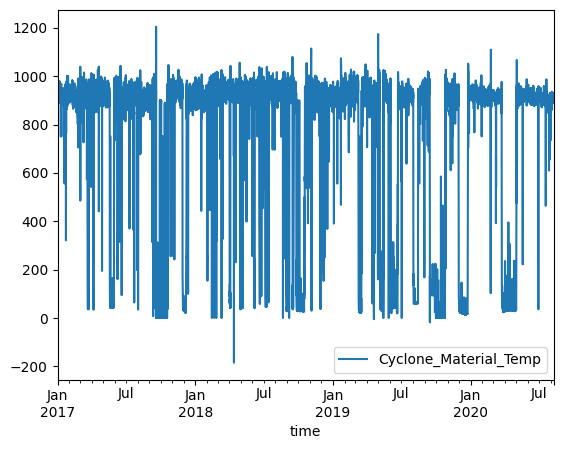

In [ ]:
# dataset having values in the interval of 5 min we turn it into hourly
df2_s=df2.set_index('time').resample('H').mean().reset_index()
df2_s['hour']=df2.time.dt.hour
df2_s.hour.nunique()
df2_s.plot(x='time', y='Cyclone_Material_Temp')


In [ ]:
df2_s['daylight'] = ((df2_s['hour'] >= 7) & (df2_s['hour'] <= 16)).astype(int)
# the day of the week (Monday=0, Sunday=6) and if it's a week end day or week day.
df2_s['DayOfTheWeek'] = df2_s['time'].dt.dayofweek
# df1['WeekDay'] = (df1['DayOfTheWeek'] < 5).astype(int)
df2_s['WeekDay'] =pd.Categorical(df2_s.time.dt.strftime('%A'), categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered= True)


In [ ]:
df2_s.isna().sum()

time                      0
Cyclone_Material_Temp    69
hour                      0
daylight                  0
DayOfTheWeek              0
WeekDay                   0
month                     0
dtype: int64

In [ ]:
df2_s['Cyclone_Material_Temp'].fillna(df2_s['Cyclone_Material_Temp'].mean(), inplace=True)


Visualizing Features

<Axes: xlabel='WeekDay'>

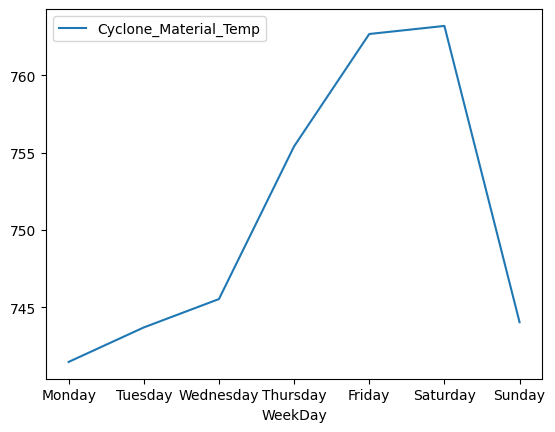

In [ ]:
df2_s[['Cyclone_Material_Temp','WeekDay']].groupby('WeekDay').mean().plot()

<Axes: xlabel='hour'>

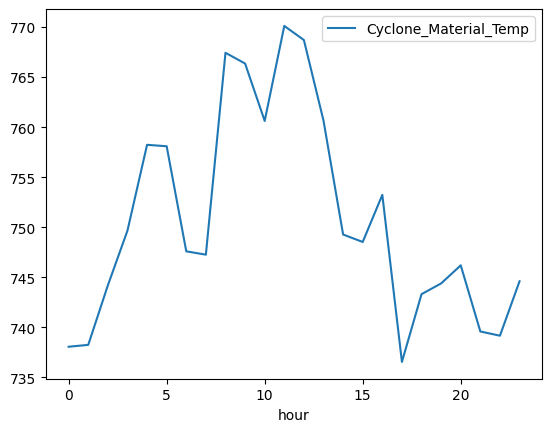

In [ ]:
df2_s[['Cyclone_Material_Temp','hour']].groupby('hour').mean().plot()

<Axes: xlabel='month'>

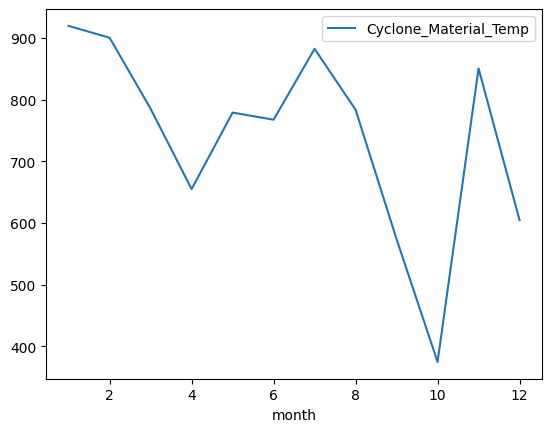

In [ ]:
df2_s['month'] = pd.to_datetime(df2_s['time']).dt.month
df2_s[['Cyclone_Material_Temp','month']].groupby('month').mean().plot()

In [ ]:
'''model2 = IsolationForest(n_estimators=150, max_samples='auto', max_features=1.0, contamination=0.05, random_state=10)
model2.fit(df2_s[['Cyclone_Material_Temp']])
scores_2 = model2.decision_function(df2_s[['Cyclone_Material_Temp']])
anomaly_2 = model2.predict(df2_s[['Cyclone_Material_Temp']])
df2_s['scores'] = scores_2
df2_s['anomaly'] = anomaly_2
anomaly = df2_s.loc[df2_s['anomaly'] == -1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))
print(anomaly.head(10))'''

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'WeekDay' feature
label_encoder = LabelEncoder()
df2_s['WeekDayEncoded'] = label_encoder.fit_transform(df2_s['WeekDay'])

# Select the features for anomaly detection
features = ['Cyclone_Material_Temp', 'hour', 'daylight', 'DayOfTheWeek', 'WeekDayEncoded', 'month']

# Fit the model to the selected features
model.fit(df2_s[features])

# Obtain the anomaly scores and predictions for the selected features
scores = model.decision_function(df2_s[features])
anomaly = model.predict(df2_s[features])

# Add the scores and anomaly predictions to the dataframe
df2_s['scores'] = scores
df2_s['anomaly'] = anomaly

# Filter out the anomalies
anomaly = df2_s.loc[df2_s['anomaly'] == -1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))
print(anomaly.head(10))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Total number of outliers is: 1575
                    time  Cyclone_Material_Temp  hour  daylight  DayOfTheWeek  \
530  2017-01-23 02:00:00             608.525833    20         0             0   
531  2017-01-23 03:00:00             406.522500    20         0             0   
532  2017-01-23 04:00:00             320.890000    20         0             0   
533  2017-01-23 05:00:00             558.081667    20         0             0   
1920 2017-03-22 00:00:00              54.120000    16         1             2   
1921 2017-03-22 01:00:00              51.053333    16         1             2   
1922 2017-03-22 02:00:00              48.242500    16         1             2   
1923 2017-03-22 03:00:00              45.339167    16         1             2   
1924 2017-03-22 04:00:00              43.058333    16         1             2   
1925 2017-03-22 05:00:00              39.762500    16         1             2   

        WeekDay  month  WeekDayEncoded    scores  anomaly  
530      Monda

In [ ]:
# Calculate the frequency of anomalies for each feature
most_common_hour_2 = df2_s['hour'].loc[df2_s['anomaly'] == -1].mode().values[0]
most_common_daylight_2 = df2_s['daylight'].loc[df2_s['anomaly'] == -1].mode().values[0]
most_common_dayofweek_2 = df2_s['DayOfTheWeek'].loc[df2_s['anomaly'] == -1].mode().values[0]
most_common_weekday_2 = df2_s['WeekDay'].loc[df2_s['anomaly'] == -1].mode().values[0]
most_common_month_2 = df2_s['month'].loc[df2_s['anomaly'] == -1].mode().values[0]


print("Most common hour with anomalies:", most_common_hour_2)
print("Most common daylight with anomalies:", most_common_daylight_2)
print("Most common day of the week with anomalies:", most_common_dayofweek_2)
print("Most common weekday with anomalies:", most_common_weekday_2)
print("Most common month with anomalies:", most_common_month_2)


Most common hour with anomalies: 0
Most common daylight with anomalies: 1
Most common day of the week with anomalies: 0
Most common weekday with anomalies: Monday
Most common month with anomalies: 12


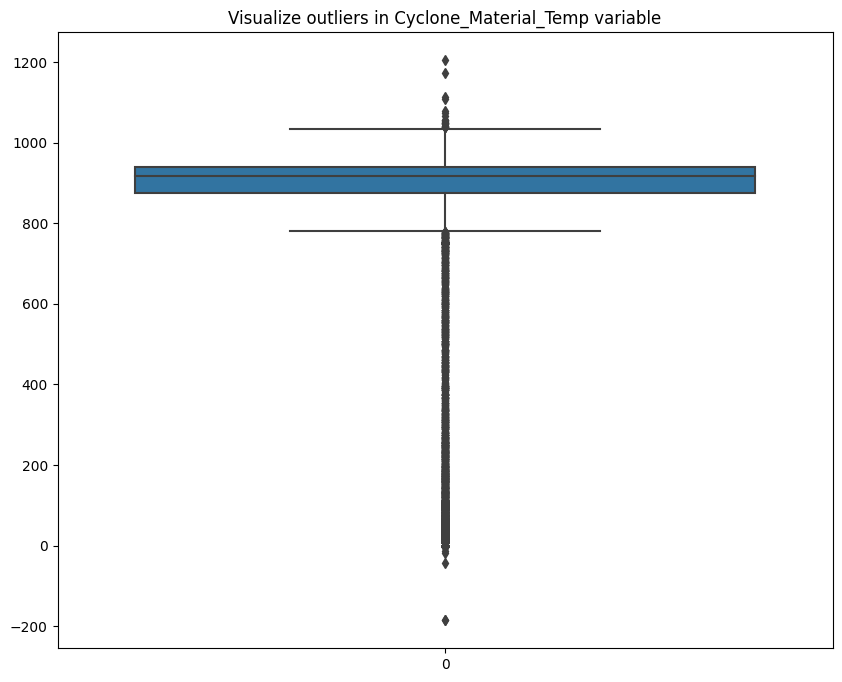

In [ ]:
f, ax = plt.subplots(figsize=(10,8))
x = df2_s['Cyclone_Material_Temp']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in Cyclone_Material_Temp variable")
plt.show()


## 3.3) Cyclone_Outlet_Gas_draft


<Axes: xlabel='time'>

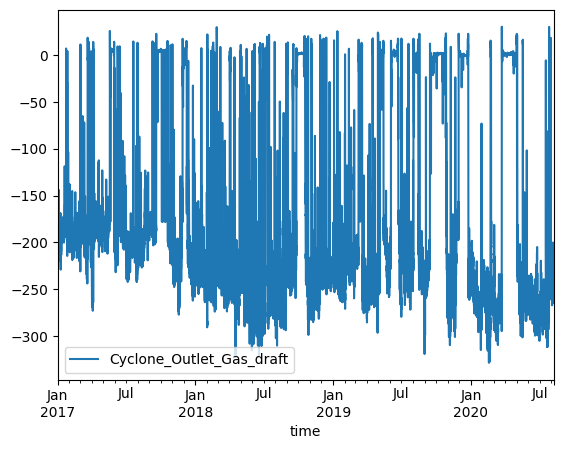

In [ ]:
# dataset having values in the interval of 5 min we turn it into hourly
df3_s=df3.set_index('time').resample('H').mean().reset_index()
df3_s['hour']=df3.time.dt.hour
df3_s.hour.nunique()
df3_s.plot(x='time', y='Cyclone_Outlet_Gas_draft')


In [ ]:
# the hours and if it's night or day (7:00-16:00)
df3_s['daylight'] = ((df3_s['hour'] >= 7) & (df3_s['hour'] <= 16)).astype(int)
# the day of the week (Monday=0, Sunday=6) and if it's a week end day or week day.
df3_s['DayOfTheWeek'] = df3_s['time'].dt.dayofweek
# df1['WeekDay'] = (df1['DayOfTheWeek'] < 5).astype(int)
df3_s['WeekDay'] =pd.Categorical(df3_s.time.dt.strftime('%A'), categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered= True)
df3_s['month'] = pd.to_datetime(df3_s['time']).dt.month


In [ ]:
df3_s.isna().sum()

time                         0
Cyclone_Outlet_Gas_draft    69
hour                         0
daylight                     0
DayOfTheWeek                 0
WeekDay                      0
month                        0
dtype: int64

In [ ]:
df3_s['Cyclone_Outlet_Gas_draft'].fillna(df3_s['Cyclone_Outlet_Gas_draft'].mean(), inplace=True)

<Axes: xlabel='WeekDay'>

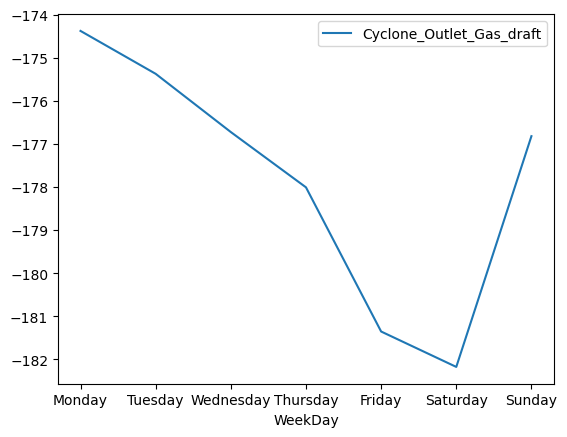

In [ ]:
df3_s[['Cyclone_Outlet_Gas_draft','WeekDay']].groupby('WeekDay').mean().plot()


<Axes: xlabel='hour'>

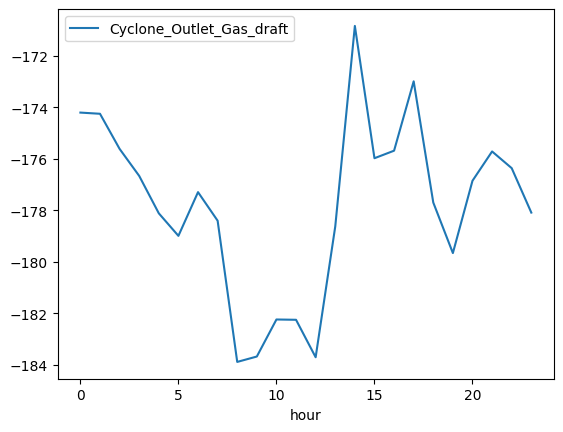

In [ ]:
df3_s[['Cyclone_Outlet_Gas_draft','hour']].groupby('hour').mean().plot()


<Axes: xlabel='month'>

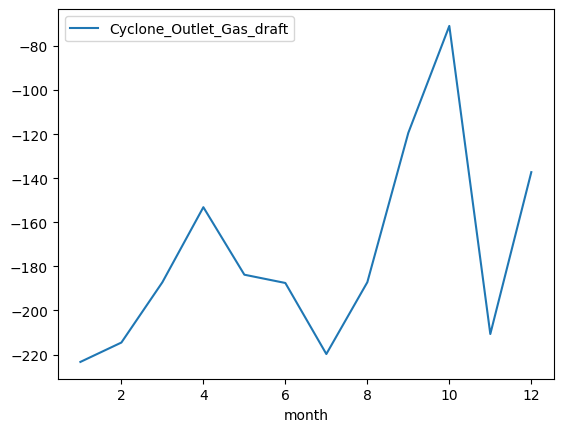

In [ ]:
df3_s['month'] = pd.to_datetime(df3_s['time']).dt.month
df3_s[['Cyclone_Outlet_Gas_draft','month']].groupby('month').mean().plot()


In [ ]:
'''model3 = IsolationForest(n_estimators=150, max_samples='auto', max_features=1.0, contamination=0.05, random_state=10)
model3.fit(df3_s[['Cyclone_Outlet_Gas_draft']])
scores = model3.decision_function(df3_s[['Cyclone_Outlet_Gas_draft']])
anomaly = model3.predict(df3_s[['Cyclone_Outlet_Gas_draft']])
df3_s['scores'] = scores
df3_s['anomaly'] = anomaly
anomaly = df3_s.loc[df3_s['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))
print(anomaly.head(10))'''


In [ ]:
df2_s

,time,Cyclone_Material_Temp,hour,daylight,DayOfTheWeek,WeekDay,month,WeekDayEncoded,scores,anomaly
0,2017-01-01 00:00:00,933.111667,0,0,6,Sunday,1,3,0.042128,1
1,2017-01-01 01:00:00,926.837500,0,0,6,Sunday,1,3,0.044414,1
2,2017-01-01 02:00:00,933.455000,0,0,6,Sunday,1,3,0.042128,1
3,2017-01-01 03:00:00,933.257500,0,0,6,Sunday,1,3,0.042128,1
4,2017-01-01 04:00:00,936.023333,0,0,6,Sunday,1,3,0.041875,1
...,...,...,...,...,...,...,...,...,...,...
31544,2020-08-07 08:00:00,894.492500,12,1,4,Friday,8,0,0.084860,1
31545,2020-08-07 09:00:00,893.871667,12,1,4,Friday,8,0,0.084860,1
31546,2020-08-07 10:00:00,906.417500,12,1,4,Friday,8,0,0.089308,1
31547,2020-08-07 11:00:00,908.872500,12,1,4,Friday,8,0,0.090405,1


In [ ]:
df3_s

,time,Cyclone_Outlet_Gas_draft,hour,daylight,DayOfTheWeek,WeekDay,month
0,2017-01-01 00:00:00,-182.855000,0,0,6,Sunday,1
1,2017-01-01 01:00:00,-179.320000,0,0,6,Sunday,1
2,2017-01-01 02:00:00,-177.724167,0,0,6,Sunday,1
3,2017-01-01 03:00:00,-178.219167,0,0,6,Sunday,1
4,2017-01-01 04:00:00,-178.020000,0,0,6,Sunday,1
...,...,...,...,...,...,...,...
31544,2020-08-07 08:00:00,-228.059167,12,1,4,Friday,8
31545,2020-08-07 09:00:00,-228.386667,12,1,4,Friday,8
31546,2020-08-07 10:00:00,-230.409167,12,1,4,Friday,8
31547,2020-08-07 11:00:00,-228.314167,12,1,4,Friday,8


In [ ]:
# One-hot encoding for 'WeekDay' column
# Perform one-hot encoding for 'WeekDay' column
df3_s_encoded = pd.get_dummies(df3_s, columns=['WeekDay'])


In [ ]:
# Encode the 'WeekDay' column
df3_s_encoded = pd.get_dummies(df3_s, columns=['WeekDay'], prefix='WeekDay')

# Select the features for model training
features = ['Cyclone_Outlet_Gas_draft', 'hour', 'daylight', 'DayOfTheWeek', 'month'] + [col for col in df3_s_encoded.columns if col.startswith('WeekDay_')]

model.fit(df3_s_encoded[features])


df3_s_encoded['scores'] = model.decision_function(df3_s_encoded[features])
df3_s_encoded['anomaly'] = model.predict(df3_s_encoded[features])

# Count the total number of outliers
total_outliers = df3_s_encoded['anomaly'].value_counts()[-1]

# the most common values
print("Total number of outliers is:", total_outliers)
print("Most common hour with anomalies:", df3_s_encoded[df3_s_encoded['anomaly'] == -1]['hour'].mode()[0])
print("Most common daylight with anomalies:", df3_s_encoded[df3_s_encoded['anomaly'] == -1]['daylight'].mode()[0])
print("Most common day of the week with anomalies:", df3_s_encoded[df3_s_encoded['anomaly'] == -1]['DayOfTheWeek'].mode()[0])
print("Most common month with anomalies:", df3_s_encoded[df3_s_encoded['anomaly'] == -1]['month'].mode()[0])



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Total number of outliers is: 1568
Most common hour with anomalies: 0
Most common daylight with anomalies: 0
Most common day of the week with anomalies: 6
Most common month with anomalies: 12


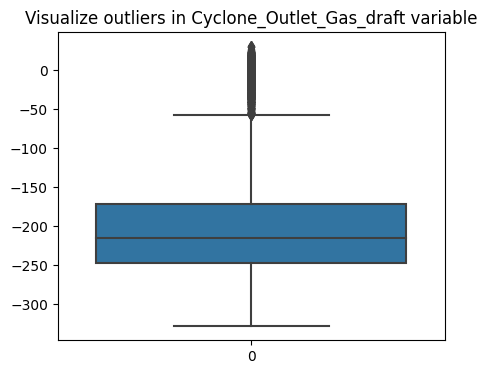

In [ ]:
f, ax = plt.subplots(figsize=(5,4))
x = df3_s['Cyclone_Outlet_Gas_draft']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in Cyclone_Outlet_Gas_draft variable")
plt.show()


## 3.4) Cyclone_cone_draft

<Axes: xlabel='time'>

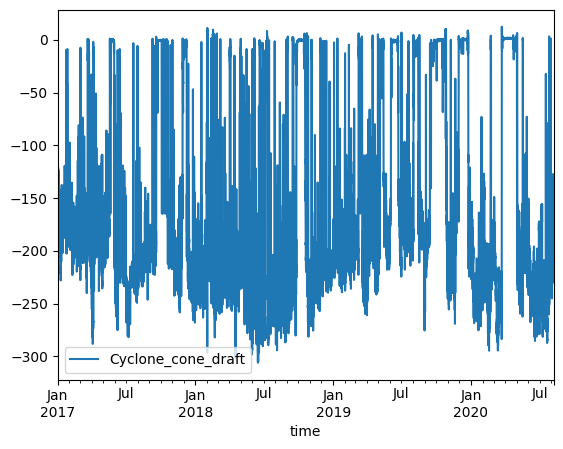

In [ ]:
# dataset having values in the interval of 5 min we turn it into hourly
df4_s=df4.set_index('time').resample('H').mean().reset_index()
df4_s['hour']=df4.time.dt.hour
df4_s.hour.nunique()
df4_s.plot(x='time', y='Cyclone_cone_draft')


In [ ]:
# the hours and if it's night or day (7:00-16:00)
df4_s['daylight'] = ((df4_s['hour'] >= 7) & (df4_s['hour'] <= 16)).astype(int)
# the day of the week (Monday=0, Sunday=6) and if it's a week end day or week day.
df4_s['DayOfTheWeek'] = df4_s['time'].dt.dayofweek
# df1['WeekDay'] = (df1['DayOfTheWeek'] < 5).astype(int)
df4_s['WeekDay'] =pd.Categorical(df4_s.time.dt.strftime('%A'), categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered= True)
df4_s['month'] = pd.to_datetime(df4_s['time']).dt.month


In [ ]:
df4_s.isna().sum()

time                   0
Cyclone_cone_draft    69
hour                   0
daylight               0
DayOfTheWeek           0
WeekDay                0
month                  0
dtype: int64

In [ ]:
df4_s['Cyclone_cone_draft'].fillna(df4_s['Cyclone_cone_draft'].mean(), inplace=True)

<Axes: xlabel='WeekDay'>

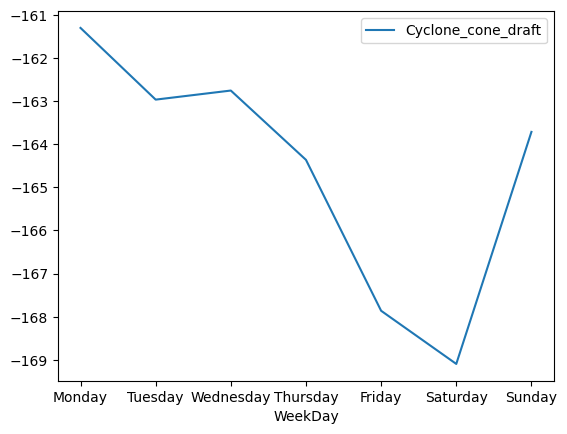

In [ ]:
df4_s[['Cyclone_cone_draft','WeekDay']].groupby('WeekDay').mean().plot()


<Axes: xlabel='hour'>

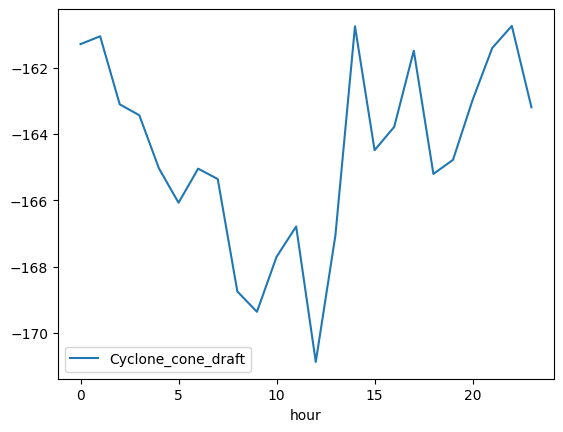

In [ ]:
df4_s['month'] = pd.to_datetime(df4_s['time']).dt.month
df4_s[['Cyclone_cone_draft','hour']].groupby('hour').mean().plot()


<Axes: xlabel='month'>

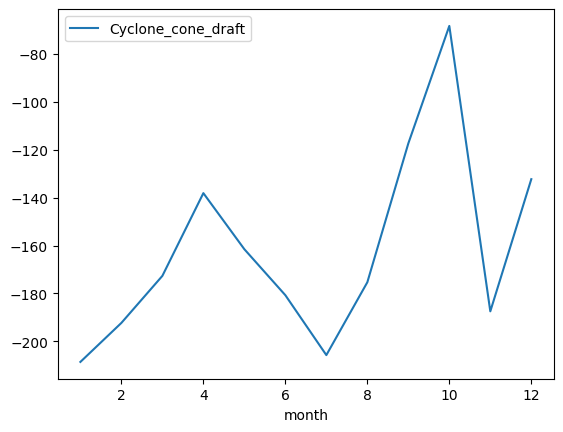

In [ ]:
df4_s['month'] = pd.to_datetime(df4_s['time']).dt.month
df4_s[['Cyclone_cone_draft','month']].groupby('month').mean().plot()


In [ ]:
'''model4 = IsolationForest(n_estimators=150, max_samples='auto', max_features=1.0, contamination=0.05, random_state=10)
model4.fit(df4_s[['Cyclone_cone_draft']])
scores = model4.decision_function(df4_s[['Cyclone_cone_draft']])
anomaly = model4.predict(df4_s[['Cyclone_cone_draft']])
df4_s['scores'] = scores
df4_s['anomaly'] = anomaly
anomaly = df4_s.loc[df4_s['anomaly'] == -1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))
print(anomaly.head(10))'''



In [ ]:
# Encode the 'WeekDay' column
df4_s_encoded = pd.get_dummies(df4_s, columns=['WeekDay'], prefix='WeekDay')

# Select the features for model training
features = ['Cyclone_cone_draft', 'hour', 'daylight', 'DayOfTheWeek', 'month'] + [col for col in df4_s_encoded.columns if col.startswith('WeekDay_')]

# Fit the model to the selected features
model.fit(df4_s_encoded[features])

# Obtain the anomaly scores and predictions for the selected features
df4_s_encoded['scores'] = model.decision_function(df4_s_encoded[features])
df4_s_encoded['anomaly'] = model.predict(df4_s_encoded[features])

# Count the total number of outliers
total_outliers = df4_s_encoded['anomaly'].value_counts()[-1]

# Print the total number of outliers and the most common values
print("Total number of outliers is:", total_outliers)
print("Most common hour with anomalies:", df4_s_encoded[df4_s_encoded['anomaly'] == -1]['hour'].mode()[0])
print("Most common daylight with anomalies:", df4_s_encoded[df4_s_encoded['anomaly'] == -1]['daylight'].mode()[0])
print("Most common day of the week with anomalies:", df4_s_encoded[df4_s_encoded['anomaly'] == -1]['DayOfTheWeek'].mode()[0])
print("Most common month with anomalies:", df4_s_encoded[df4_s_encoded['anomaly'] == -1]['month'].mode()[0])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Total number of outliers is: 1578
Most common hour with anomalies: 0
Most common daylight with anomalies: 0
Most common day of the week with anomalies: 6
Most common month with anomalies: 12


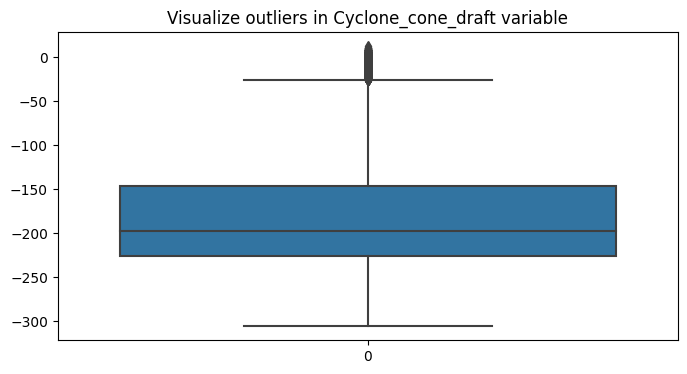

In [ ]:
f, ax = plt.subplots(figsize=(8,4))
x = df4_s['Cyclone_cone_draft']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in Cyclone_cone_draft variable")
plt.show()


## 3.5) Cyclone_Gas_Outlet_Temp

<Axes: xlabel='time'>

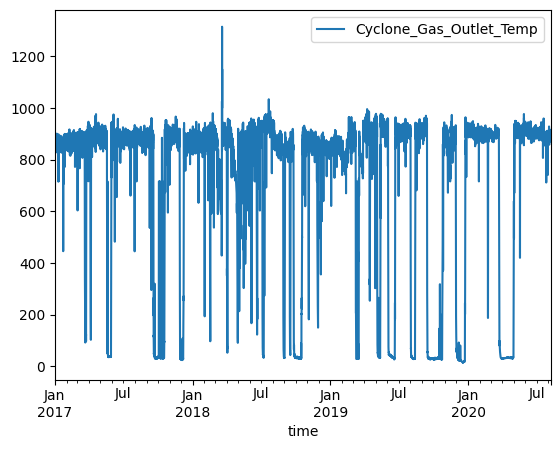

In [ ]:
# dataset having values in the interval of 5 min we turn it into hourly
df5_s=df5.set_index('time').resample('H').mean().reset_index()
df5_s['hour']=df1.time.dt.hour
df5_s.hour.nunique()
df5_s.plot(x='time', y='Cyclone_Gas_Outlet_Temp')


In [ ]:
# the hours and if it's night or day (7:00-16:00)
df5_s['daylight'] = ((df5_s['hour'] >= 7) & (df5_s['hour'] <= 16)).astype(int)
# the day of the week (Monday=0, Sunday=6) and if it's a week end day or week day.
df5_s['DayOfTheWeek'] = df5_s['time'].dt.dayofweek
# df1['WeekDay'] = (df1['DayOfTheWeek'] < 5).astype(int)
df5_s['WeekDay'] =pd.Categorical(df5_s.time.dt.strftime('%A'), categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered= True)
df5_s['month'] = pd.to_datetime(df5_s['time']).dt.month



In [ ]:
df5_s.isna().sum()

time                        0
Cyclone_Gas_Outlet_Temp    69
hour                        0
daylight                    0
DayOfTheWeek                0
WeekDay                     0
month                       0
dtype: int64

In [ ]:
df5_s['Cyclone_Gas_Outlet_Temp'].fillna(df5_s['Cyclone_Gas_Outlet_Temp'].mean(), inplace=True)

<Axes: xlabel='WeekDay'>

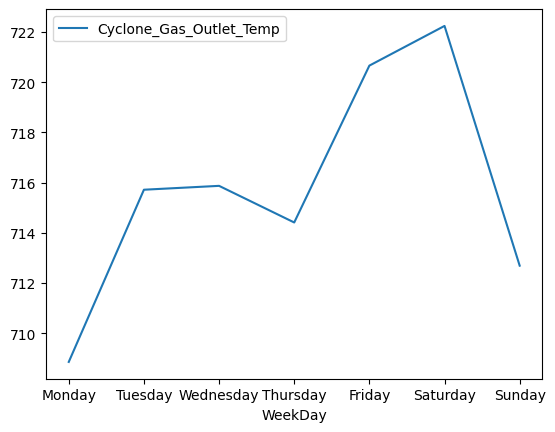

In [ ]:
df5_s[['Cyclone_Gas_Outlet_Temp','WeekDay']].groupby('WeekDay').mean().plot()


<Axes: xlabel='hour'>

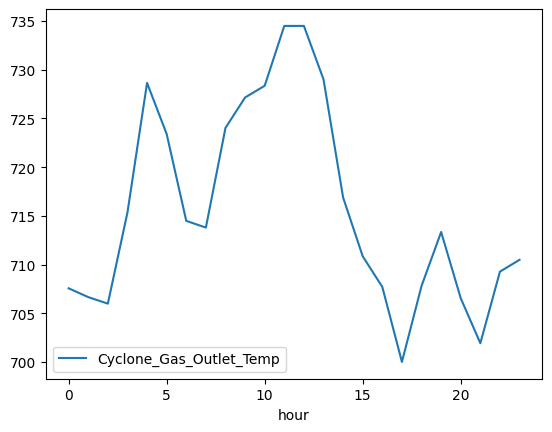

In [ ]:
df5_s[['Cyclone_Gas_Outlet_Temp','hour']].groupby('hour').mean().plot()


<Axes: xlabel='month'>

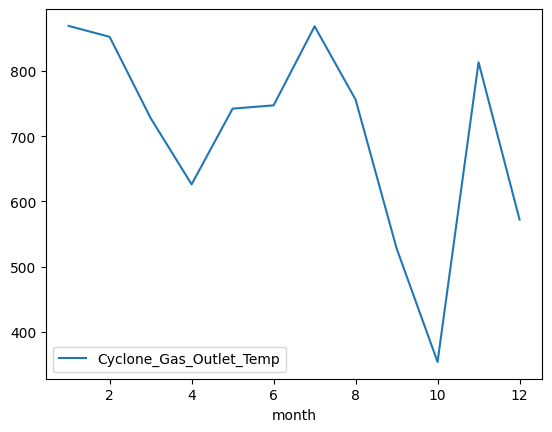

In [ ]:
df5_s['month'] = pd.to_datetime(df5_s['time']).dt.month
df5_s[['Cyclone_Gas_Outlet_Temp','month']].groupby('month').mean().plot()


In [ ]:
'''model5 = IsolationForest(n_estimators=150, max_samples='auto', contamination=0.01, random_state=10)
model5.fit(df5_s[['Cyclone_Gas_Outlet_Temp']])
print(model5.get_params())

scores = model5.decision_function(df5_s[['Cyclone_Gas_Outlet_Temp']])
anomaly = model5.predict(df5_s[['Cyclone_Gas_Outlet_Temp']])
df5_s['scores'] = scores
df5_s['anomaly'] = anomaly

anomaly = df5_s.loc[df5_s['anomaly'] == -1]
anomaly_index = list(anomaly.index)'''


In [ ]:
# Encode weekday feature
df5_s['WeekDay'] = df5_s['WeekDay'].cat.codes

# Select the features for the model
features = ['Cyclone_Gas_Outlet_Temp', 'daylight', 'DayOfTheWeek', 'WeekDay', 'month']

# Fit the model to the selected features
model.fit(df5_s[features])

# Obtain the anomaly scores and predictions for the selected features
df5_s['scores'] = model.decision_function(df5_s[features])
df5_s['anomaly'] = model.predict(df5_s[features])

# Count the total number of outliers
total_outliers = df5_s['anomaly'].sum()
print("Total number of outliers is:", total_outliers)

# Find the most common values associated with anomalies
most_common_hour = df5_s[df5_s['anomaly'] == 1]['hour'].value_counts().idxmax()
most_common_daylight = df5_s[df5_s['anomaly'] == 1]['daylight'].value_counts().idxmax()
most_common_dayofweek = df5_s[df5_s['anomaly'] == 1]['DayOfTheWeek'].value_counts().idxmax()
most_common_weekday = df5_s[df5_s['anomaly'] == 1]['WeekDay'].value_counts().idxmax()
most_common_month = df5_s[df5_s['anomaly'] == 1]['month'].value_counts().idxmax()

print("Most common hour with anomalies:", most_common_hour)
print("Most common daylight with anomalies:", most_common_daylight)
print("Most common day of the week with anomalies:", most_common_dayofweek)
print("Most common weekday with anomalies:", most_common_weekday)
print("Most common month with anomalies:", most_common_month)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Total number of outliers is: 28395
Most common hour with anomalies: 4
Most common daylight with anomalies: 0
Most common day of the week with anomalies: 3
Most common weekday with anomalies: 3
Most common month with anomalies: 1


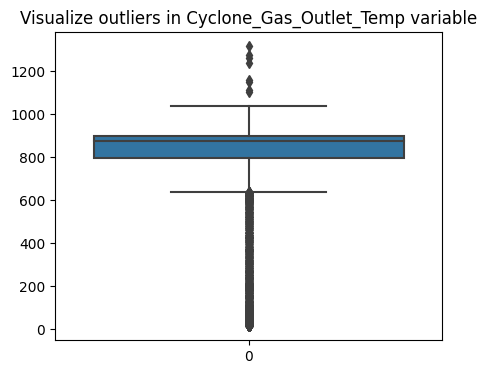

In [ ]:
f, ax = plt.subplots(figsize=(5,4))
x = df5_s['Cyclone_Gas_Outlet_Temp']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in Cyclone_Gas_Outlet_Temp variable")
plt.show()


## 3.6) Cyclone_Inlet_Draft

<Axes: xlabel='time'>

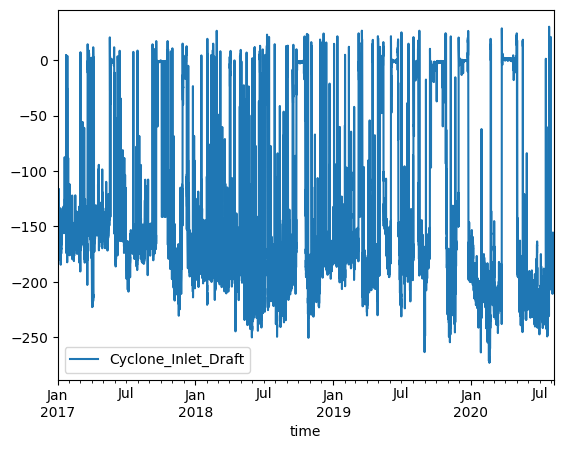

In [ ]:
# dataset having values in the interval of 5 min we turn it into hourly
df6_s=df6.set_index('time').resample('H').mean().reset_index()
df6_s['hour']=df1.time.dt.hour
df6_s.hour.nunique()
df6_s.plot(x='time', y='Cyclone_Inlet_Draft')


In [ ]:
# the hours and if it's night or day (7:00-16:00)
df6_s['daylight'] = ((df6_s['hour'] >= 7) & (df6_s['hour'] <= 16)).astype(int)
# the day of the week (Monday=0, Sunday=6) and if it's a week end day or week day.
df6_s['DayOfTheWeek'] = df6_s['time'].dt.dayofweek
# df1['WeekDay'] = (df1['DayOfTheWeek'] < 5).astype(int)
df6_s['WeekDay'] =pd.Categorical(df6_s.time.dt.strftime('%A'), categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered= True)
df6_s['month'] = pd.to_datetime(df6_s['time']).dt.month


In [ ]:
df6_s.isna().sum()

time                    0
Cyclone_Inlet_Draft    69
hour                    0
daylight                0
DayOfTheWeek            0
WeekDay                 0
month                   0
dtype: int64

In [ ]:
df6_s['Cyclone_Inlet_Draft'].fillna(df6_s['Cyclone_Inlet_Draft'].mean(), inplace=True)

<Axes: xlabel='WeekDay'>

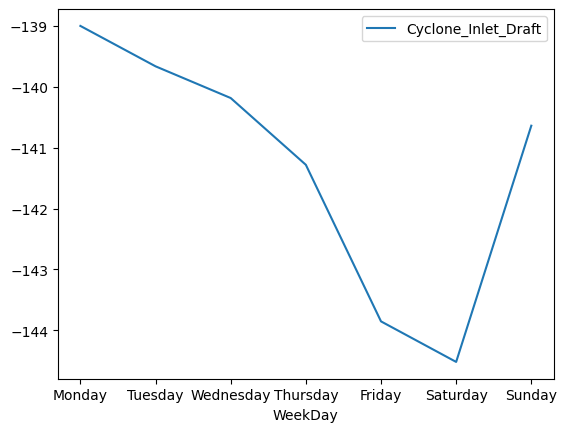

In [ ]:
df6_s[['Cyclone_Inlet_Draft','WeekDay']].groupby('WeekDay').mean().plot()


<Axes: xlabel='hour'>

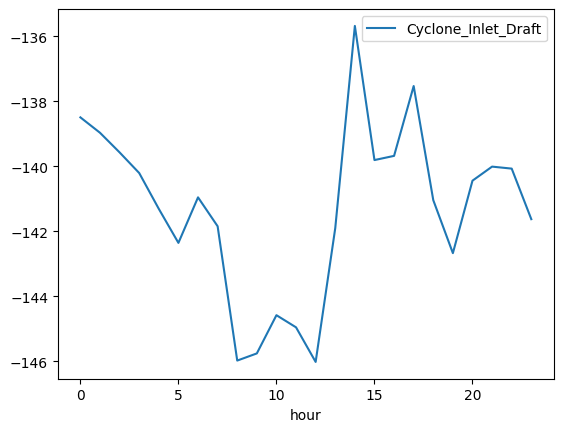

In [ ]:
df6_s[['Cyclone_Inlet_Draft','hour']].groupby('hour').mean().plot()


<Axes: xlabel='month'>

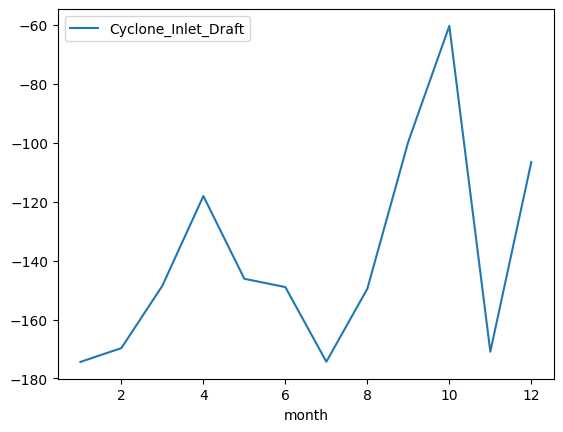

In [ ]:
df6_s['month'] = pd.to_datetime(df6_s['time']).dt.month
df6_s[['Cyclone_Inlet_Draft','month']].groupby('month').mean().plot()


In [ ]:
'''model6 = IsolationForest(n_estimators=150, max_samples='auto', contamination=0.05, random_state=10)
model6.fit(df6_s[['Cyclone_Inlet_Draft']])
print(model6.get_params())
scores = model6.decision_function(df6_s[['Cyclone_Inlet_Draft']])
anomaly = model6.predict(df6_s[['Cyclone_Inlet_Draft']])
df6_s['scores'] = scores
df6_s['anomaly'] = anomaly
anomaly = df6_s.loc[df6_s['anomaly'] == -1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))
print(anomaly.head(10))
print('Total number of anomalies is:', len(anomaly))
print('Percentage of anomalies:', round(100*len(anomaly)/len(df6_s),2), '%')'''


In [ ]:
import pandas as pd

# Perform one-hot encoding for the WeekDay feature
df6_s_encoded = pd.get_dummies(df6_s, columns=['WeekDay'], prefix='WeekDay')

features = ['Cyclone_Inlet_Draft', 'daylight', 'DayOfTheWeek', 'WeekDay_Tuesday',
            'WeekDay_Wednesday', 'WeekDay_Thursday', 'WeekDay_Friday', 'WeekDay_Saturday',
            'WeekDay_Sunday', 'month']

# Fit the model to the selected features
model.fit(df6_s_encoded[features])

# Obtain the anomaly scores and predictions for the selected features
anomaly_scores = model.decision_function(df6_s_encoded[features])
predictions = model.predict(df6_s_encoded[features])

# Count the number of outliers
num_outliers = np.sum(predictions == -1)

# Find the most common values among outliers
most_common_hour = df6_s.loc[predictions == -1, 'hour'].mode().values[0]
most_common_daylight = df6_s.loc[predictions == -1, 'daylight'].mode().values[0]
most_common_day_of_week = df6_s.loc[predictions == -1, 'DayOfTheWeek'].mode().values[0]
most_common_weekday = df6_s.loc[predictions == -1, 'WeekDay'].mode().values[0]
most_common_month = df6_s.loc[predictions == -1, 'month'].mode().values[0]

print("Total number of outliers is:", num_outliers)
print("Most common hour with anomalies:", most_common_hour)
print("Most common daylight with anomalies:", most_common_daylight)
print("Most common day of the week with anomalies:", most_common_day_of_week)
print("Most common weekday with anomalies:", most_common_weekday)
print("Most common month with anomalies:", most_common_month)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Total number of outliers is: 1578
Most common hour with anomalies: 16
Most common daylight with anomalies: 1
Most common day of the week with anomalies: 6
Most common weekday with anomalies: Sunday
Most common month with anomalies: 12


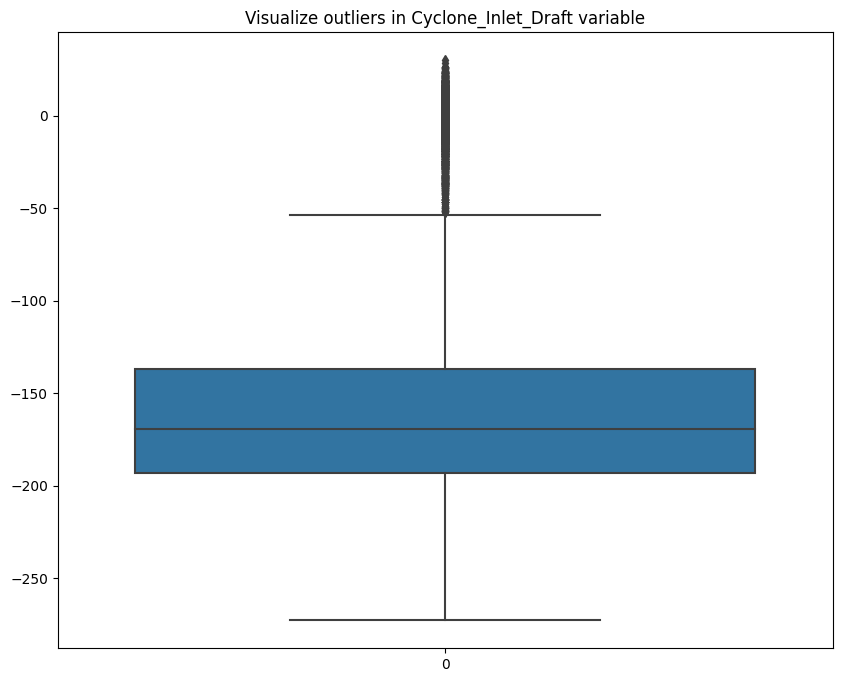

In [ ]:
f, ax = plt.subplots(figsize=(10,8))
x = df6_s['Cyclone_Inlet_Draft']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in Cyclone_Inlet_Draft variable")
plt.show()
